In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
ecg_dataset = pd.read_csv("creditcard.csv")
ecg_dataset = ecg_dataset.apply(pd.to_numeric, errors='coerce').dropna()  # Clean non-numeric values

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(ecg_dataset.values)

# Split data for training and testing
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Build the autoencoder model
input_dim = X_train.shape[1]
encoder = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu')
])

decoder = keras.Sequential([
    keras.layers.Input(shape=(8,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(input_dim, activation='linear')
])

autoencoder = keras.Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True)

# Detect anomalies
y_pred = autoencoder.predict(X_test)
mse = np.mean(np.square(X_test - y_pred), axis=1)
threshold = np.percentile(mse, 95)  # Adjust as needed

# Anomaly predictions
anomalies = mse > threshold
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

C:\Users\ameyp\AppData\Local\Temp\ipykernel_14920\2558258605.py:10: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  ecg_dataset = pd.read_csv("creditcard.csv")


Epoch 1/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.5374
Epoch 2/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.3581
Epoch 3/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.3196
Epoch 4/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.2986
Epoch 5/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.2809
Epoch 6/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.2683
Epoch 7/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.2600
Epoch 8/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.2502
Epoch 9/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.2484
Epoch 10/10
5317/7121 [=====================>........] - ETA: 2s - loss: 0.2393

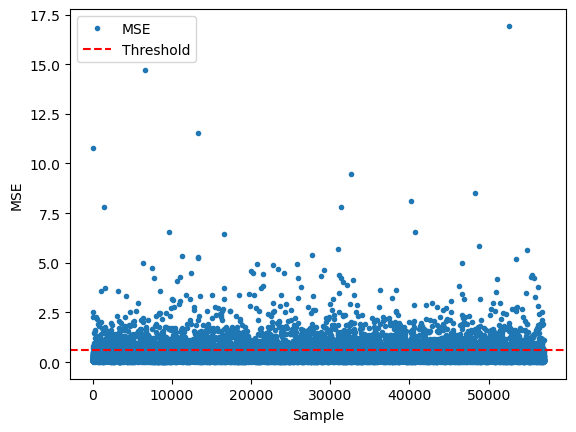

In [11]:
plt.plot(mse, 'o', markersize=3, label='MSE')
plt.axhline(threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Sample')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [10]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(anomalies, anomalies))

print("\nClassification Report:")
print(classification_report(anomalies, anomalies))

Confusion Matrix:
[[54113     0]
 [    0  2849]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     54113
        True       1.00      1.00      1.00      2849

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962

